In [1]:
import tensorflow as tf
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [2]:
tf.config.set_visible_devices([], 'GPU')


In [2]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7433182170228287054
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2966106932
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8254409103926491695
physical_device_desc: "device: 0, name: NVIDIA GeForce 940MX, pci bus id: 0000:03:00.0, compute capability: 5.0"
]


In [3]:
path = f"{getcwd()}/dogs-vs-cats.zip"
local_zip=path
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('cats_vs_dogs/data')
zip_ref.close()

KeyboardInterrupt: 

In [18]:
#unzip traing set
path_train=f"{getcwd()}/data/train.zip"
local_zip_train = path_train
zip_ref_train=zipfile.ZipFile(local_zip_train,'r')
zip_ref_train.extractall('cats_vs_dogs/data/train')
zip_ref_train.close()

In [17]:
#unzip testing data
path_test=f"{getcwd()}/data/test1.zip"
local_zip_test = path_train
zip_ref_test=zipfile.ZipFile(local_zip_train,'r')
zip_ref_test.extractall('cat_vs_dogs/data/test')
zip_ref_test.close()

In [2]:
print(len(os.listdir('/data/train')))
print(len(os.listdir('/data/test')))

2
10500


In [3]:
train_dir="/data/train"
#print(len(os.listdir(train_dir)))
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=10,
                                                 class_mode='binary',
                                                 target_size=(150,150))


Found 24999 images belonging to 2 classes.


In [4]:
test_dir="/data/test"
#print(len(os.listdir(test_dir)))
test_datagen=ImageDataGenerator(rescale=1.0/255.)
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 batch_size=10,
                                                 class_mode='binary',
                                                 target_size=(150,150))

Found 2002 images belonging to 2 classes.


In [5]:
train_cat_fnames = os.listdir(os.path.join(train_dir,'cat') )
train_dog_fnames = os.listdir( os.path.join(train_dir,'dog') )
# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg']


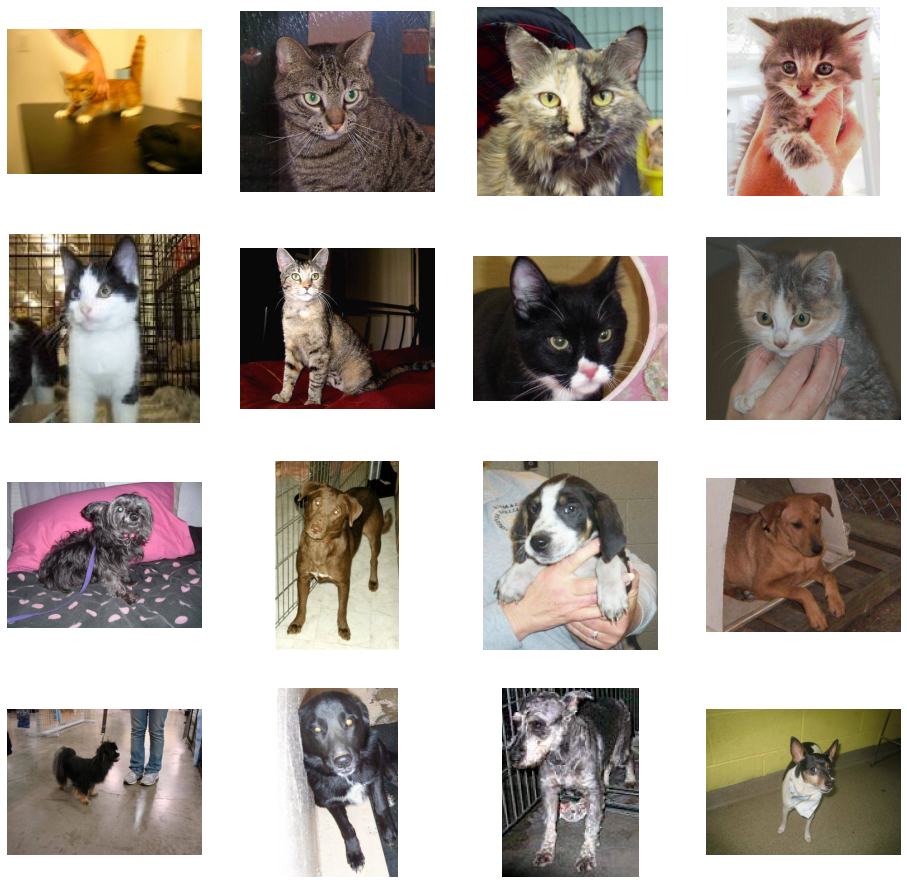

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [7]:
train_fnames = os.listdir(train_dir+'/cat')
test_fnames = os.listdir(test_dir)
print(train_fnames[:10])
print(test_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg']


In [8]:
local_weights_file="G:\data\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [9]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
x = layers.Flatten()(last_output)
#x= layers.Dense(2048,activation='relu')(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [13]:
model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [14]:
history = model.fit(train_generator,
                              epochs=10,
                              steps_per_epoch=2500,
                              verbose=1,
                              validation_data=test_generator)


Epoch 1/10
2500/2500 [==============================] - 1586s 632ms/step - loss: 0.2221 - acc: 0.9160 - val_loss: 0.5083 - val_acc: 0.9436
Epoch 2/10
2500/2500 [==============================] - 1532s 613ms/step - loss: 0.1928 - acc: 0.9326 - val_loss: 0.9519 - val_acc: 0.9291
Epoch 3/10
2500/2500 [==============================] - 1544s 618ms/step - loss: 0.1910 - acc: 0.9358 - val_loss: 1.1697 - val_acc: 0.9436
Epoch 4/10
2500/2500 [==============================] - 1537s 615ms/step - loss: 0.1836 - acc: 0.9440 - val_loss: 1.1413 - val_acc: 0.9446
Epoch 5/10
2500/2500 [==============================] - 1561s 624ms/step - loss: 0.1798 - acc: 0.9464 - val_loss: 1.5744 - val_acc: 0.9356
Epoch 6/10
2500/2500 [==============================] - 1543s 617ms/step - loss: 0.1863 - acc: 0.9467 - val_loss: 1.3770 - val_acc: 0.9451
Epoch 7/10
2500/2500 [==============================] - 1560s 624ms/step - loss: 0.1766 - acc: 0.9474 - val_loss: 1.1782 - val_acc: 0.9436
Epoch 8/10
2500/2500 [=====

Text(0.5, 1.0, 'Training and validation loss')

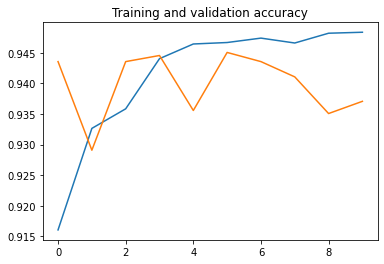

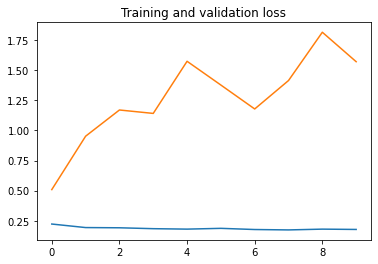

In [15]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [20]:
loss,acc=model.evaluate(test_generator)

201/201 [==============================] - 50s 248ms/step - loss: 1.5710 - acc: 0.9371


In [29]:
image_batch, label_batch = next(iter(train_generator))
print((image_batch))


[[[[0.15294118 0.43921572 0.3647059 ]
   [0.15294118 0.43921572 0.3647059 ]
   [0.15294118 0.43921572 0.3647059 ]
   ...
   [0.2471408  0.59607846 0.50980395]
   [0.2509804  0.59607846 0.50980395]
   [0.25032386 0.59607846 0.50980395]]

  [[0.15294118 0.43921572 0.3647059 ]
   [0.15294118 0.43921572 0.3647059 ]
   [0.15294118 0.43921572 0.3647059 ]
   ...
   [0.24727687 0.59607846 0.50980395]
   [0.2509804  0.59607846 0.50980395]
   [0.25062385 0.59607846 0.50980395]]

  [[0.15294118 0.43921572 0.3647059 ]
   [0.15294118 0.43921572 0.3647059 ]
   [0.15294118 0.43921572 0.3647059 ]
   ...
   [0.24757689 0.59607846 0.50980395]
   [0.25074965 0.59607846 0.50980395]
   [0.25092387 0.59607846 0.50980395]]

  ...

  [[0.4156863  0.41133416 0.43008086]
   [0.4156863  0.4110333  0.42917824]
   [0.4156863  0.4107324  0.42827561]
   ...
   [0.48551407 0.6178449  0.6881845 ]
   [0.5512019  0.67113715 0.70774853]
   [0.58814555 0.7215482  0.7588723 ]]

  [[0.41644675 0.4131663  0.42188922]
   [0.4

tf.Tensor(
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]], shape=(10, 1), dtype=int32)
[0. 1. 1. 1. 1. 1. 1. 0. 1. 0.]


NameError: name 'class_names' is not defined

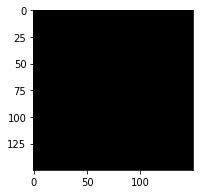

In [42]:
image_batch, label_batch = next(iter(test_generator))


predictions=model.predict(image_batch)
prediction = tf.nn.sigmoid(predictions)

prediction_1 = tf.where(prediction < 0.5, 0, 1)
print(prediction_1)
print(label_batch)
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[prediction_1[i]])
  plt.axis("off")

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: 'accuracy'